# Exploration Notebook

## Introduction

Welcome to the Exploration Notebook. This notebook is dedicated to exploring various aspects of our project, including data gathering, processing, and analysis. We will start by examining the functionality of FITS (Flexible Image Transport System) files, which are commonly used in astronomy for storing images and other data. This notebook will serve as a sandbox for testing and validating different components of our project.

## Glossary

- **FITS (Flexible Image Transport System)**: A digital file format used to store, transmit, and manipulate scientific and other images.
- **HDU (Header Data Unit)**: The primary building block of a FITS file, consisting of a header and data unit. The header contains metadata about the data unit, such as the size, data type, and coordinate system.
- **DSS (Digitized Sky Survey)**: A collection of digitized photographic images of the night sky.
- **2MASS (Two Micron All Sky Survey)**: An astronomical survey of the whole sky in the infrared spectrum.
- **OpenCV**: An open-source computer vision and machine learning software library.
- **MAST (Mikulski Archive for Space Telescopes)**: An archive that provides access to astronomical data from various space missions.

## FITS Files Exploration

In this section, we will explore the functionality of FITS files. Specifically, we will test the following possibilities:
- Incorporating more than one image in a FITS file.
- Incorporating multiple image types (visual, blue/red wavelength, IR, etc.) in one FITS file.

### Creating a FITS File with Random Data

First, let's create a FITS file with multiple images using random data to understand the basic structure and functionality.


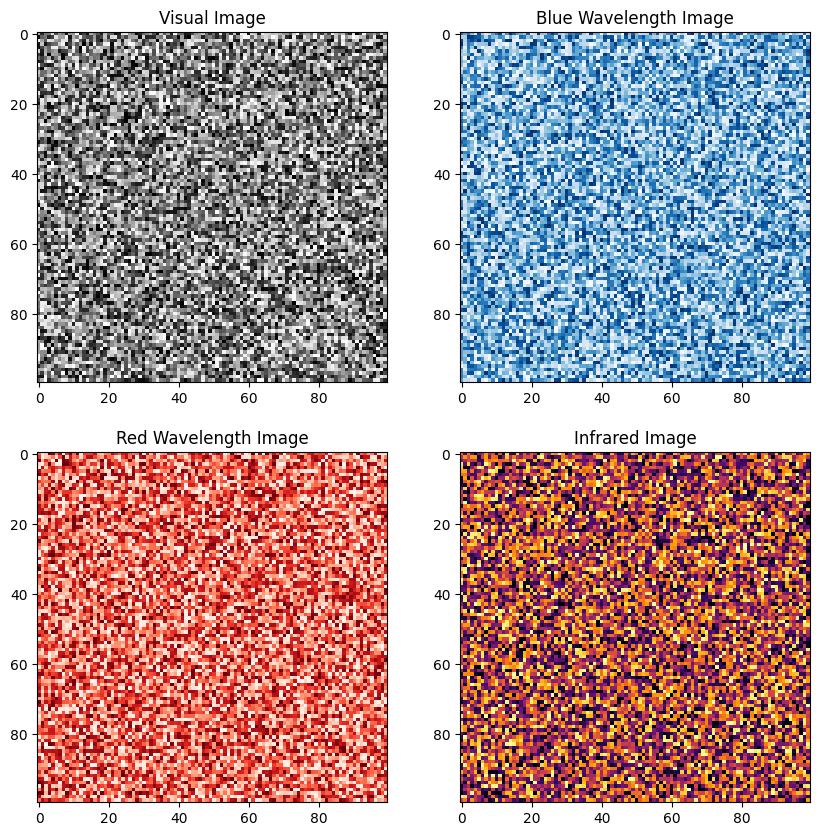

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Create sample data for different image types
visual_image = np.random.rand(100, 100)  # Visual image
blue_wavelength_image = np.random.rand(100, 100)  # Blue wavelength image
red_wavelength_image = np.random.rand(100, 100)  # Red wavelength image
ir_image = np.random.rand(100, 100)  # Infrared image

# Display the sample images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(visual_image, cmap='gray')
axs[0, 0].set_title('Visual Image')
axs[0, 1].imshow(blue_wavelength_image, cmap='Blues')
axs[0, 1].set_title('Blue Wavelength Image')
axs[1, 0].imshow(red_wavelength_image, cmap='Reds')
axs[1, 0].set_title('Red Wavelength Image')
axs[1, 1].imshow(ir_image, cmap='inferno')
axs[1, 1].set_title('Infrared Image')
plt.show()

# Create Primary HDU
primary_hdu = fits.PrimaryHDU()

# Create Image HDUs for each image type
visual_hdu = fits.ImageHDU(visual_image, name='VISUAL')
blue_hdu = fits.ImageHDU(blue_wavelength_image, name='BLUE')
red_hdu = fits.ImageHDU(red_wavelength_image, name='RED')
ir_hdu = fits.ImageHDU(ir_image, name='IR')

# Create an HDU list and write to a FITS file
hdul = fits.HDUList([primary_hdu, visual_hdu, blue_hdu, red_hdu, ir_hdu])
hdul.writeto('test.fits', overwrite=True)

### Testing the HDU and Displaying Header Info

Next, we will test the HDU and display the header information for each image.

In [2]:
# Import necessary libraries
import sys
import os
import numpy as np
import cv2
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

# Add the parent directory of the scripts folder to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

# Import the AstroImageProcessor class
from scripts.astro_image_processor import AstroImageProcessor

# Define coordinates and surveys
coordinates = SkyCoord("18h18m48s -13d49m00s", frame='icrs')
surveys = ['DSS', 'DSS1 Blue', 'DSS2 Red', 'WISE 3.4']

# Create an instance of AstroImageProcessor
processor = AstroImageProcessor(coordinates, surveys, radius=0.15)

# Fetch images
processor.fetch_images()

# Save images to a FITS file
processor.save_to_fits('test.fits')

# Load images from the FITS file
processor.load_from_fits('test.fits')

# Display FITS information
processor.display_fits_info('test.fits')

AttributeError: 'AstroImageProcessor' object has no attribute 'load_from_fits'

In [ ]:

# Display header information
processor.display_header_info()

### Fetching Images from Different Surveys
Next, we will fetch images from different surveys using the SkyView.get_images function from the astroquery library.

In [ ]:
processor.display_images()

### Summary

In this section, we have successfully:
- Created a FITS file with multiple images using random data.
- Fetched images from different surveys using the `SkyView.get_images` function.
- Incorporated more than one image in a FITS file.
- Incorporated multiple image types (visual, blue/red wavelength, IR, etc.) in one FITS file.
- Read and displayed the images from the FITS file to verify the functionality.

By using FITS files, we can efficiently store and manage multiple types of astronomical images in a single file, making it easier to handle and analyze the data.

---

### Testing OpenCV Parameters

In this section, we will test different OpenCV parameters to optimize the star detection process. We will focus on the following parameters:

1. **Canny Edge Detection Thresholds**: We will test different values for the lower and upper thresholds used in the Canny edge detection algorithm.
2. **Gaussian Blur Kernel Size**: We will test different kernel sizes for the Gaussian blur to see how it affects the image output.
3. **Adaptive Threshold Block Size**: We will test different block sizes for the adaptive thresholding to optimize the detection of stars.

#### 1. Testing Canny Edge Detection Thresholds

We will test different combinations of `canny_thresh1` and `canny_thresh2` to see their effects on the image output.


In [ ]:

# Example usage with the processor object
canny_thresholds = [(50, 150), (100, 200), (150, 250), (75, 175), (125, 225)]
for canny_thresh1, canny_thresh2 in canny_thresholds:
    print(f"Testing with canny_thresh1={canny_thresh1} and canny_thresh2={canny_thresh2}")
    processed_images = processor.process_with_opencv(blur_ksize=(1, 1), block_size=5, C=1, canny_thresh1=canny_thresh1, canny_thresh2=canny_thresh2, iterations=1)
    processor.display_unprocessed_and_processed_images(processor.images, processed_images)



#### 2. Testing Gaussian Blur Kernel Size

We will test different kernel sizes for the Gaussian blur to see how it affects the image output.

In [ ]:
# Example usage with the processor object
blur_ksizes = [(1, 1), (3, 3), (5, 5), (7, 7), (9, 9)]
for blur_ksize in blur_ksizes:
    print(f"Testing with blur_ksize={blur_ksize}")
    processed_images = processor.process_with_opencv(blur_ksize=blur_ksize, block_size=5, C=1, canny_thresh1=100, canny_thresh2=200, iterations=1)
    processor.display_unprocessed_and_processed_images(processor.images, processed_images)


#### 3. Testing Adaptive Threshold Block Size

We will test different block sizes for the adaptive thresholding to optimize the detection of stars.


In [ ]:

# Example usage with the processor object
block_sizes = [3, 5, 7, 9, 11]
for block_size in block_sizes:
    print(f"Testing with block_size={block_size}")
    processed_images = processor.process_with_opencv(blur_ksize=(1, 1), block_size=block_size, C=1, canny_thresh1=100, canny_thresh2=200, iterations=1)
    processor.display_unprocessed_and_processed_images(processor.images, processed_images)



By running these tests, we can observe the effects of different OpenCV parameters on the star detection process and fine-tune the parameters to achieve better results.

In [ ]:
# Example usage with the processor object
blur_ksizes = [(1, 1), (3, 3), (5, 5), (7, 7), (9, 9)]
for blur_ksize in blur_ksizes:
    print(f"Testing with blur_ksize={blur_ksize}")
    processed_images = processor.process_with_opencv(blur_ksize=blur_ksize, block_size=5, C=1, canny_thresh1=100, canny_thresh2=200, iterations=1)
    processor.display_unprocessed_and_processed_images(processor.images, processed_images)


#### 3. Testing Adaptive Threshold Block Size

We will test different block sizes for the adaptive thresholding to optimize the detection of stars.


In [ ]:

# Example usage with the processor object
block_sizes = [3, 5, 7, 9, 11]
for block_size in block_sizes:
    print(f"Testing with block_size={block_size}")
    processed_images = processor.process_with_opencv(blur_ksize=(1, 1), block_size=block_size, C=1, canny_thresh1=100, canny_thresh2=200, iterations=1)
    processor.display_unprocessed_and_processed_images(processor.images, processed_images)

By running these tests, we can observe the effects of different OpenCV parameters on the star detection process and fine-tune the parameters to achieve better results.

In [ ]:
# Example usage with the processor object
processed_images = processor.process_with_opencv(blur_ksize=(1, 1), block_size=5, C=1, canny_thresh1=100, canny_thresh2=200,iterations=1)

# Display processed images
processor.display_unprocessed_and_processed_images(processor.images, processed_images)

In [1]:
# Import necessary libraries
import sys
import os
import numpy as np
import cv2
import random
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

# Add the parent directory of the scripts folder to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

# Import the AstroImageProcessor class
from scripts.astro_image_processor import AstroImageProcessor

# Define surveys and coordinates
surveys = ['DSS']
coordinates = SkyCoord(ra=172.63903944*u.deg, dec=48.98346557*u.deg, frame='icrs')

# Create an instance of AstroImageProcessor with test coordinates (172.63903944, 48.98346557)
processor = AstroImageProcessor(coordinates, surveys, radius=0.15)
print(f"Processor fits filename: {processor.fits} (type: {type(processor.fits).__name__})")  # Debug statement

# Save images to a FITS file
processor.save_to_fits(processor.fits)

# Retrieve star data from the images
processor.star_data = processor.retrieve_star_data()
print(processor.star_data)

Processor fits filename: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7efca3fcf9d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7efca3fcd8d0>] (type: HDUList)


TypeError: can only concatenate str (not "HDUList") to str

In [2]:
# Append or replace star data in the FITS file
processor.append_star_data_to_fits()

self.fits before check: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7ff69c11d960>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7ff65fbb25f0>] (type: HDUList)


TypeError: self.fits should be a string representing the filename, but got HDUList.

In [3]:
processor.display_fits_info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  DSS           1 ImageHDU       171   (300, 300)   float32   


In [8]:
processor.append_star_data_to_fits()

TypeError: self.fits should be a string representing the filename.

In [ ]:
processor.display_fits_info('test.fits')

In [ ]:
# Print the coordinates used for fetching images and retrieving star data
print(f"Coordinates used: {processor.get_coordinates().to_string('hmsdms')}")

In [ ]:
# Get and print star data from the FITS file
processor.get_star_data_from_fits('test.fits')
processor.print_star_data_from_fits('test.fits')


Initialized self.fits_filename: output.fits (type: str)
Processor fits filename: output.fits (type: str)


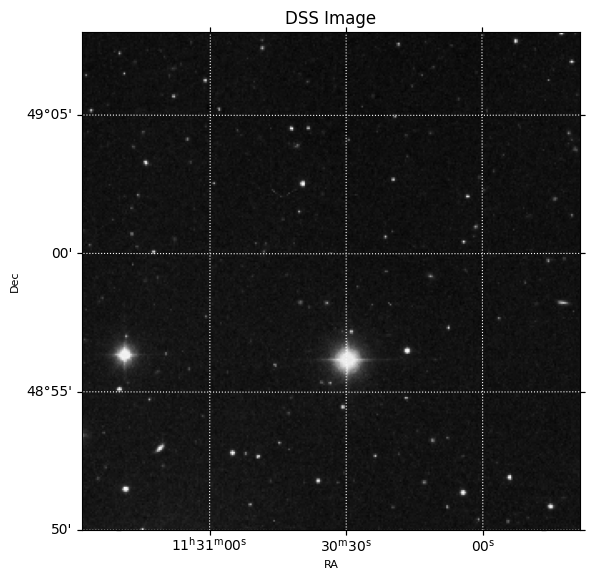

Processor fits filename after save: test.fits (type: str)


In [1]:
# Import necessary libraries
import sys
import os
import numpy as np
import cv2
import random
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

# Add the parent directory of the scripts folder to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

# Import the AstroImageProcessor class
from scripts.astro_image_processor import AstroImageProcessor

# Define surveys and coordinates
surveys = ['DSS']
coordinates = SkyCoord(ra=172.63903944*u.deg, dec=48.98346557*u.deg, frame='icrs')

# Create an instance of AstroImageProcessor with test coordinates (172.63903944, 48.98346557)
processor = AstroImageProcessor(coordinates, surveys, radius=0.15)
print(f"Processor fits filename: {processor.fits_filename} (type: {type(processor.fits_filename).__name__})")  # Debug statement

# Display images
processor.display_images()

# Save images to a FITS file
processor.save_to_fits('test.fits')
print(f"Processor fits filename after save: {processor.fits_filename} (type: {type(processor.fits_filename).__name__})")  # Debug statement


In [2]:

# Retrieve star data from the images
processor.star_data = processor.retrieve_star_data()
print(processor.star_data)


   _r     HIP     RAhms       DEdms    ... Notes   _RA.icrs     _DE.icrs  
                                       ...           deg          deg     
-------- ----- ----------- ----------- ... ----- ------------ ------------
0.048696 56147 11 30 29.83 +48 56 08.7 ...       172.62432291  48.93571107


In [3]:

# Append or replace star data in the FITS file
processor.append_star_data_to_fits()


In [ ]:
processor.display_fits_info('test.fits')

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  STAR_DATA     1 BinTableHDU     65   1R x 15C   [D, J, 11A, 11A, E, D, D, E, D, D, E, E, 1A, D, D]   


In [5]:


# Print the coordinates used for fetching images and retrieving star data
print(f"Coordinates used: {processor.get_coordinates().to_string('hmsdms')}")


Coordinates used: 11h30m33.3694656s +48d59m00.476052s


In [6]:
print(processor.fits_filename)

test.fits


In [7]:
# Get and print star data from the FITS file
processor.get_star_data_from_fits('test.fits')


KeyError: "Extension 'STAR_DATA' not found."

In [8]:

processor.print_star_data_from_fits()



AttributeError: 'AstroImageProcessor' object has no attribute 'print_star_data_from_fits'

In [8]:
# Import necessary libraries
import sys
import os
import numpy as np
import cv2
import random
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

# Add the parent directory of the scripts folder to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

# Import the AstroImageProcessor class
from scripts.astro_image_processor import AstroImageProcessor

# Generate initial random coordinates
coordinates = SkyCoord("18h18m48s -13d49m00s", frame='icrs')
surveys = ['DSS']
processor = AstroImageProcessor(coordinates, surveys, radius=0.15)

Initialized self.fits_filename: output.fits (type: str)
No star data found for coordinates <SkyCoord (ICRS): (ra, dec) in deg
    (132.84044896, 53.80260962)>.


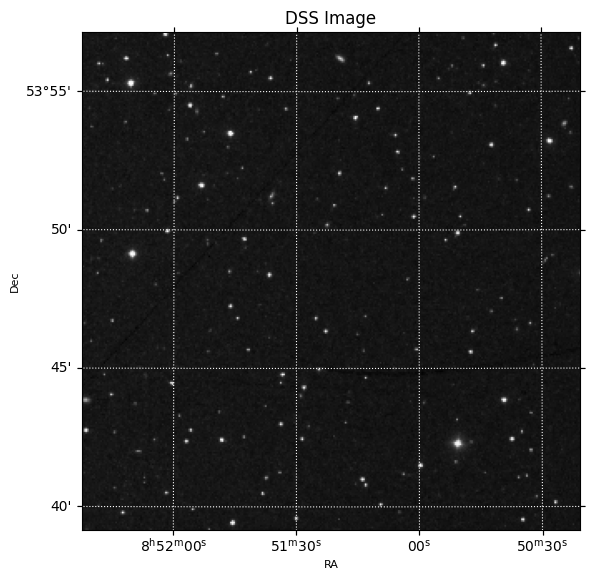

In [9]:
processor.display_images()

In [12]:
# processor.display_fits_info('../data/raw/output.fits')
processor.display_fits_info('../data/raw/output.fits')

Filename: ../data/raw/output.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  DSS           1 ImageHDU         8   (300, 300)   float32   


In [3]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Covert this skycoord from degrees to h m s and d m s
coords = SkyCoord(ra=172.63903944*u.deg, dec=48.98346557*u.deg, frame='icrs')
print(coords.to_string('hmsdms'))


11h30m33.3694656s +48d59m00.476052s
